In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
from google.colab import drive
from google.colab import files

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics 


In [ ]:
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/house-prices-advanced-regression-techniques

Mounted at /content/gdrive
/content/gdrive/My Drive/house-prices-advanced-regression-techniques


In [ ]:
#Load the data
dfRaw = pd.read_csv("train.csv", index_col="Id")

In [ ]:
print(dfRaw.head())


    MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
Id                                    ...                                  
1           60       RL         65.0  ...        WD        Normal    208500
2           20       RL         80.0  ...        WD        Normal    181500
3           60       RL         68.0  ...        WD        Normal    223500
4           70       RL         60.0  ...        WD       Abnorml    140000
5           60       RL         84.0  ...        WD        Normal    250000

[5 rows x 80 columns]


BsmtFinType2_GLQ     0.000076
RoofMatl_Metal      -0.000304
RoofStyle_Mansard   -0.000308
GarageCond_Gd       -0.000983
Foundation_Wood      0.002711
                       ...   
GarageArea           0.623431
GarageCars           0.640409
GrLivArea            0.708624
OverallQual          0.790982
SalePrice            1.000000
Length: 289, dtype: float64


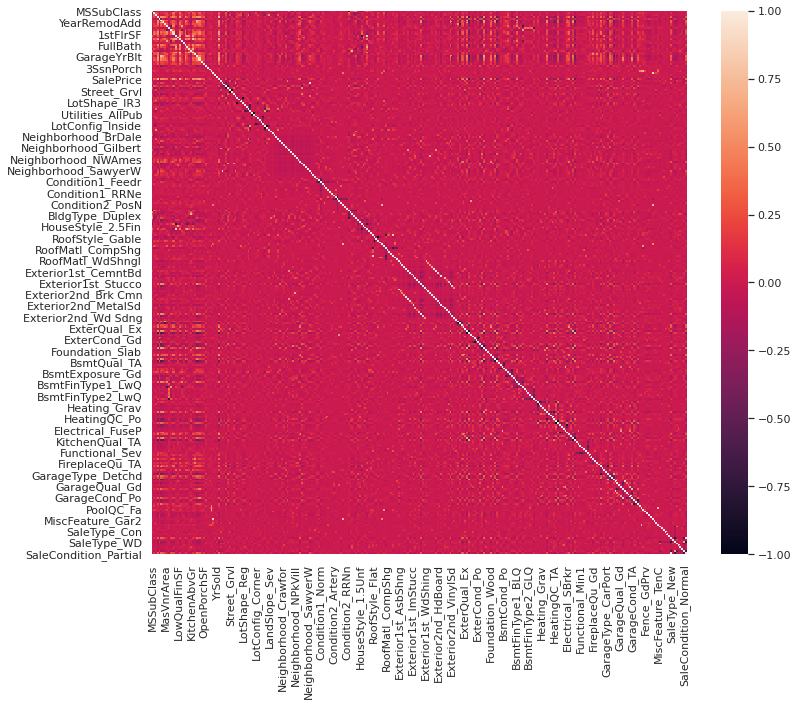

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})

dfEncoded = dfRaw.fillna(dfRaw.mean())
dfEncoded = pd.get_dummies(dfEncoded)
corrs = dfEncoded.corr().astype(float)

sns.heatmap(corrs)

s = corrs.unstack()
sorted = s.sort_values(key=abs)
print(sorted["SalePrice"])





In [ ]:
dfEncoded = dfRaw.fillna(dfRaw.mean())
dfEncoded = pd.get_dummies(dfEncoded)
dfEncoded = dfEncoded.astype(float)

print(dfEncoded.columns)

cols = dfEncoded.columns
dfEncoded = StandardScaler().fit_transform(dfEncoded)
dfEncoded = pd.DataFrame(dfEncoded,columns=cols) #return column labels

#Take the top X components, then fit and transform the data
numComponents = 155
pca = PCA(n_components=numComponents)
principalComponents = pca.fit_transform(dfEncoded)

cumsum = pca.explained_variance_ratio_.cumsum()
print(cumsum)
#sns.barplot(x=[i for i in range(0,numComponents)],y=cumsum)


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=289)
[0.06556567 0.09442272 0.11847757 0.13755515 0.15450673 0.17033935
 0.18468544 0.19683156 0.20881605 0.22032148 0.23150783 0.24205955
 0.2525131  0.26266634 0.27241022 0.28201519 0.29148384 0.30073355
 0.30982515 0.31861323 0.32709498 0.33555737 0.3438124  0.35190994
 0.35993141 0.36773559 0.37539487 0.38291588 0.3904213  0.3978175
 0.40512836 0.41236869 0.41950614 0.42659429 0.43354238 0.44038454
 0.44712218 0.4537579  0.46032636 0.46679752 0.47320508 0.47955321
 0.48586215 0.49195016 0.49795085 0.50388698 0.50976051 0.51555722
 0.52127836 0.52695185 0

0       0.3
1       0.0
2       0.5
3      -0.5
4       0.9
       ... 
1455   -0.1
1456    0.4
1457    1.1
1458   -0.5
1459   -0.4
Name: SalePrice, Length: 1460, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


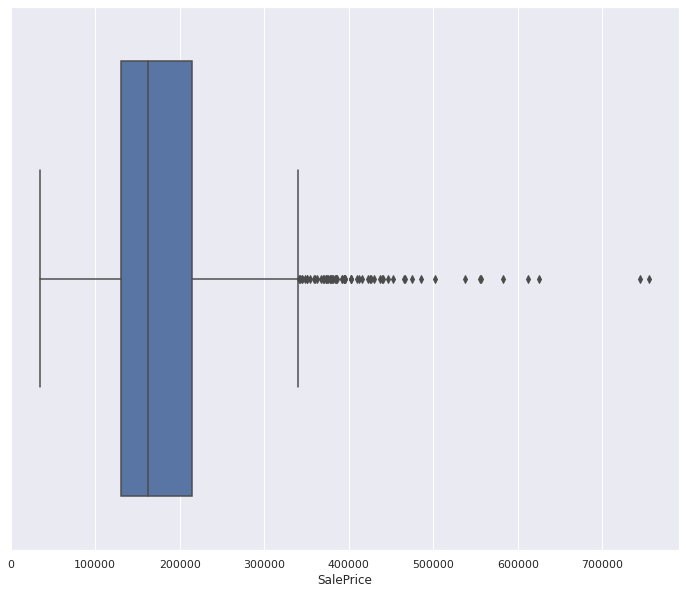

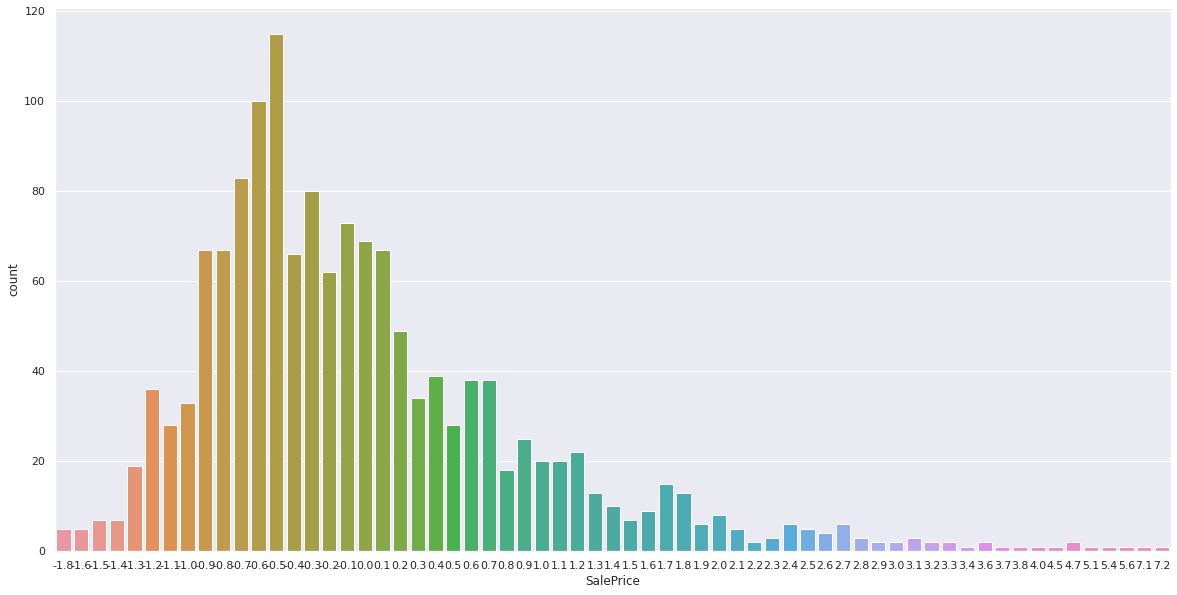

In [ ]:
dfEncoded = dfRaw.fillna(dfRaw.mean())
dfEncoded = pd.get_dummies(dfEncoded)
dfEncoded = dfEncoded.astype(float)

cols = dfEncoded.columns
dfEncoded = StandardScaler().fit_transform(dfEncoded)
dfEncoded = pd.DataFrame(dfEncoded,columns=cols) #return column labels

sns.boxplot(dfRaw.SalePrice)


dfEncoded["SalePrice"] = round(dfEncoded["SalePrice"],1)
print(dfEncoded["SalePrice"])

sns.set(rc={'figure.figsize':(20,10)})
plt.figure() 
#plt.setp(cbar.ax.get_xticklabels()[::2], visible=False)
sns.countplot(x=dfEncoded.SalePrice, data=dfEncoded)
